In [355]:
import pymongo
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 9]

In [356]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.trading
collection = db.GOOGL

In [357]:
df = pd.DataFrame(list(collection.find()))

In [358]:
df

,_id,date,open,high,low,close,volume,symbol
0,5f5a28b9b958665e885f9000,2020-09-09T00:00:00.000Z,1548.90,1558.7200,1525.1700,1547.230,1962078.0,GOOGL
1,5f5a28b9b958665e885f9001,2020-09-08T00:00:00.000Z,1525.00,1555.5500,1516.5000,1523.600,2701586.0,GOOGL
2,5f5a28b9b958665e885f9002,2020-09-04T00:00:00.000Z,1609.00,1634.9900,1537.9701,1581.210,2792533.0,GOOGL
3,5f5a28b9b958665e885f9003,2020-09-03T00:00:00.000Z,1699.52,1700.0000,1607.7100,1629.510,3186287.0,GOOGL
4,5f5a28b9b958665e885f9004,2020-09-02T00:00:00.000Z,1668.01,1726.1022,1660.1900,1717.390,2476072.0,GOOGL
...,...,...,...,...,...,...,...,...
4038,5f5a28b9b958665e885f9fc6,2004-08-25T00:00:00.000Z,104.76,108.0000,103.8800,106.000,9188600.0,GOOGL
4039,5f5a28b9b958665e885f9fc7,2004-08-24T00:00:00.000Z,111.24,111.6000,103.5700,104.870,15247300.0,GOOGL
4040,5f5a28b9b958665e885f9fc8,2004-08-23T00:00:00.000Z,110.76,113.4800,109.0500,109.400,18256100.0,GOOGL
4041,5f5a28b9b958665e885f9fc9,2004-08-20T00:00:00.000Z,101.01,109.0800,100.5000,108.310,22834300.0,GOOGL


In [359]:
df2 = df[['date', 'symbol', 'open', 'close', 'high', 'low', 'volume']]

In [360]:
df2['date'] = pd.to_datetime(df2['date']).dt.tz_localize(None)

/Users/guoleyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [361]:
df2

,date,symbol,open,close,high,low,volume
0,2020-09-09,GOOGL,1548.90,1547.230,1558.7200,1525.1700,1962078.0
1,2020-09-08,GOOGL,1525.00,1523.600,1555.5500,1516.5000,2701586.0
2,2020-09-04,GOOGL,1609.00,1581.210,1634.9900,1537.9701,2792533.0
3,2020-09-03,GOOGL,1699.52,1629.510,1700.0000,1607.7100,3186287.0
4,2020-09-02,GOOGL,1668.01,1717.390,1726.1022,1660.1900,2476072.0
...,...,...,...,...,...,...,...
4038,2004-08-25,GOOGL,104.76,106.000,108.0000,103.8800,9188600.0
4039,2004-08-24,GOOGL,111.24,104.870,111.6000,103.5700,15247300.0
4040,2004-08-23,GOOGL,110.76,109.400,113.4800,109.0500,18256100.0
4041,2004-08-20,GOOGL,101.01,108.310,109.0800,100.5000,22834300.0


In [362]:
#df2 = df2.set_index('date')

In [363]:
df3 = df2[['date', 'open']]

In [384]:
df3 = df3.resample('1440Min', on='date').first().drop('date', 1).reset_index()

In [387]:
#df3 = df3.dropna()


,date,open
0,2004-08-19,100.01
1,2004-08-20,101.01
2,2004-08-21,101.01
3,2004-08-22,101.01
4,2004-08-23,110.76
...,...,...
5861,2020-09-05,1609.00
5862,2020-09-06,1609.00
5863,2020-09-07,1609.00
5864,2020-09-08,1525.00


In [386]:
df3 = df3.fillna(method='ffill')

In [388]:
df3

,date,open
0,2004-08-19,100.01
1,2004-08-20,101.01
2,2004-08-21,101.01
3,2004-08-22,101.01
4,2004-08-23,110.76
...,...,...
5861,2020-09-05,1609.00
5862,2020-09-06,1609.00
5863,2020-09-07,1609.00
5864,2020-09-08,1525.00


In [389]:
from darts import TimeSeries

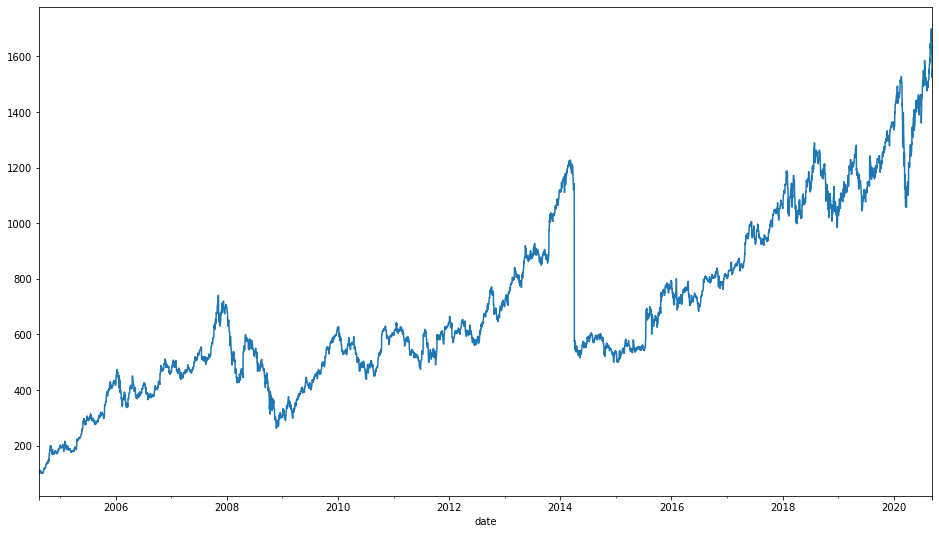

In [391]:
series = TimeSeries.from_dataframe(df3, 'date', 'open','D')
series.plot()

In [404]:
from darts.models import ExponentialSmoothing
train, val = series.split_before(pd.Timestamp('20180101'))

In [406]:
model = ExponentialSmoothing()
model.fit(train)

prediction = model.predict(len(val))

/Users/guoleyang/opt/anaconda3/lib/python3.7/site-packages/darts/models/exponential_smoothing.py:66: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.seasonal_periods)
/Users/guoleyang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


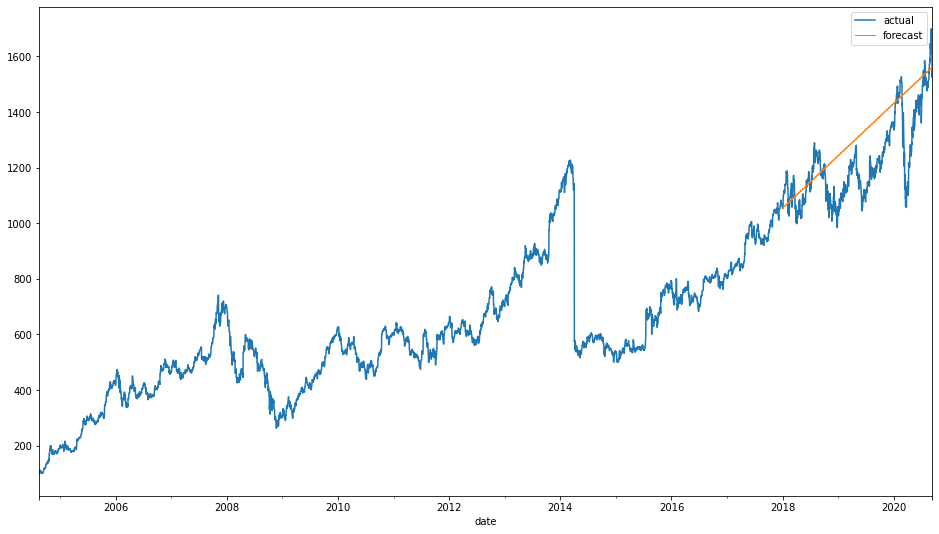

In [407]:
series.plot(label='actual')
prediction.plot(label='forecast', lw=1)
plt.legend()

In [426]:
from darts.models import AutoARIMA
model_aarima = AutoARIMA()

In [410]:
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

/Users/guoleyang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/guoleyang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [411]:
prediction_aarima

                      0
2018-01-01  1055.549321
2018-01-02  1055.494934
2018-01-03  1055.544797
2018-01-04  1055.499082
2018-01-05  1055.540994
...                 ...
2020-09-05  1055.520947
2020-09-06  1055.520947
2020-09-07  1055.520947
2020-09-08  1055.520947
2020-09-09  1055.520947

[983 rows x 1 columns]
Freq: D

In [415]:
from darts.backtesting import backtest_forecasting
from darts.models import Prophet

In [418]:
models = [ExponentialSmoothing(), Prophet()]

In [425]:
backtests = [backtest_forecasting(series, model,pd.Timestamp('2020-01-01'), fcast_horizon_n=3) for model in models]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

SystemError: <class 'stanfit4anon_model_861b75c6337e237650a61ae58c4385ef_3827973547975722349.PyStanHolder'> returned a result with an error set

In [ ]:
from darts.metrics import mape
series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))
plt.title('Backtests with 3-months forecast horizon')
plt.legend()